In [1]:
# En tu Jupyter Notebook
from database_read import read_session_data, get_session_by_id

# Cargar todos los datos
datos = read_session_data()

Se leyeron 4 sesiones de la base de datos


In [19]:
print(type(datos['datos_bpm']))
print(len(datos['datos_bpm']))

<class 'list'>
4


In [3]:
import matplotlib.pyplot as plt

In [50]:
sesion = 2
print(len(datos['datos_bpm'][sesion]), 'muestras')

5545 muestras


In [ ]:
print(datos['session_ids'][2])
print(datos['patient_ids'][2])
print(datos['fechas'][2])
print(datos['notas'][2])

2
2
2025-05-26 16:41:51
5545
Sesión actualizada el 2025-05-26 16:43:23. Datos almacenados: 5545 muestras.


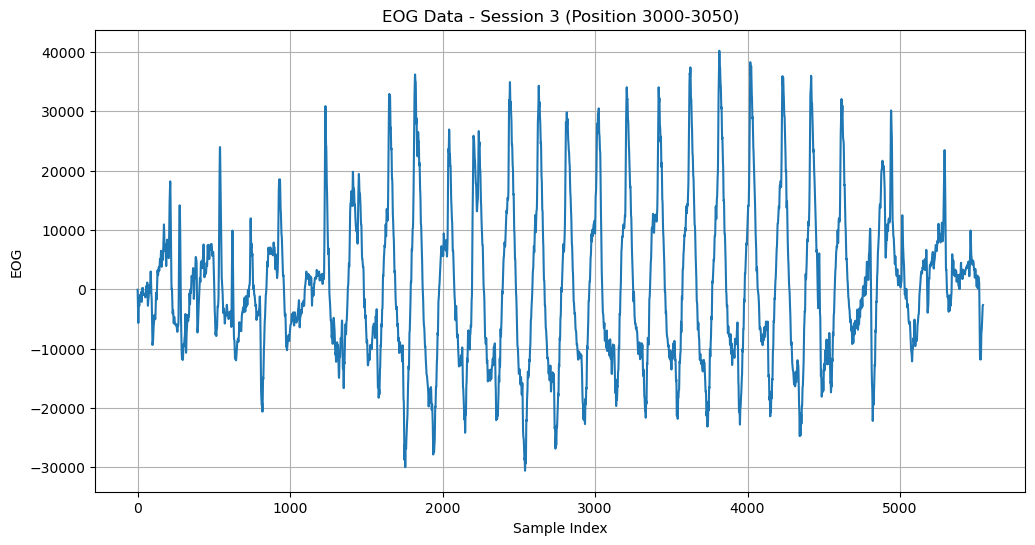

In [ ]:
limit_c = 0 
limit_d = 5545 

# Extract BPM data from position 3000 to 3050
eog_segment = datos['datos_eog'][sesion][limit_c:limit_d]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(limit_c, limit_d), eog_segment)
plt.title(f'EOG Data - Session 3 (Position 3000-3050)')
plt.xlabel('Sample Index')
plt.ylabel('EOG')
plt.grid(True)
plt.show()

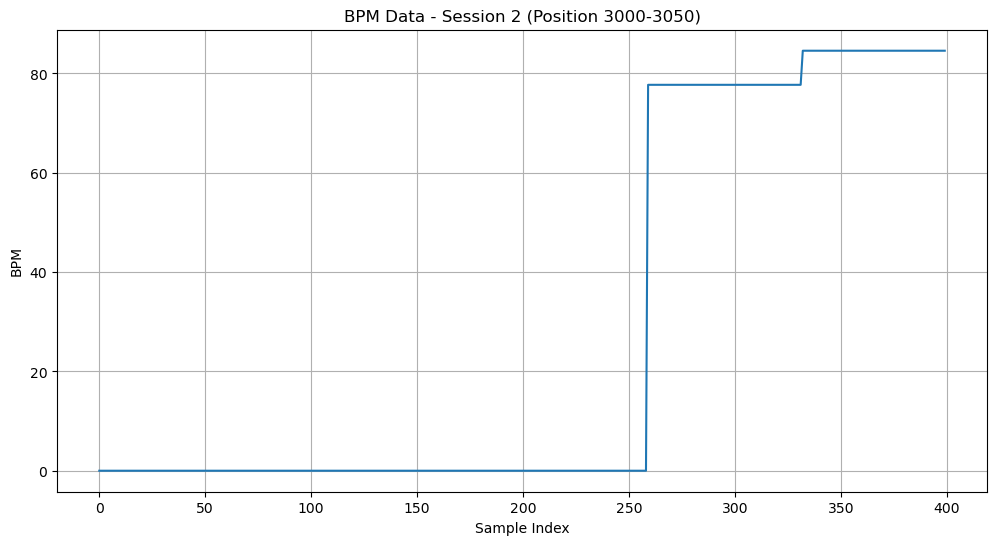

In [16]:
limit_a = 0
limit_b = 400

# Extract BPM data from position 3000 to 3050
bpm_segment = datos['datos_bpm'][2][limit_a:limit_b]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(limit_a, limit_b), bpm_segment)
plt.title('BPM Data - Session 2 (Position 3000-3050)')
plt.xlabel('Sample Index')
plt.ylabel('BPM')
plt.grid(True)
plt.show()

In [8]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))
from src.views.signal_analyzer import SignalAnalyzer

In [9]:
analyzer = SignalAnalyzer()

In [11]:
analyzer.load_all_sessions()

True

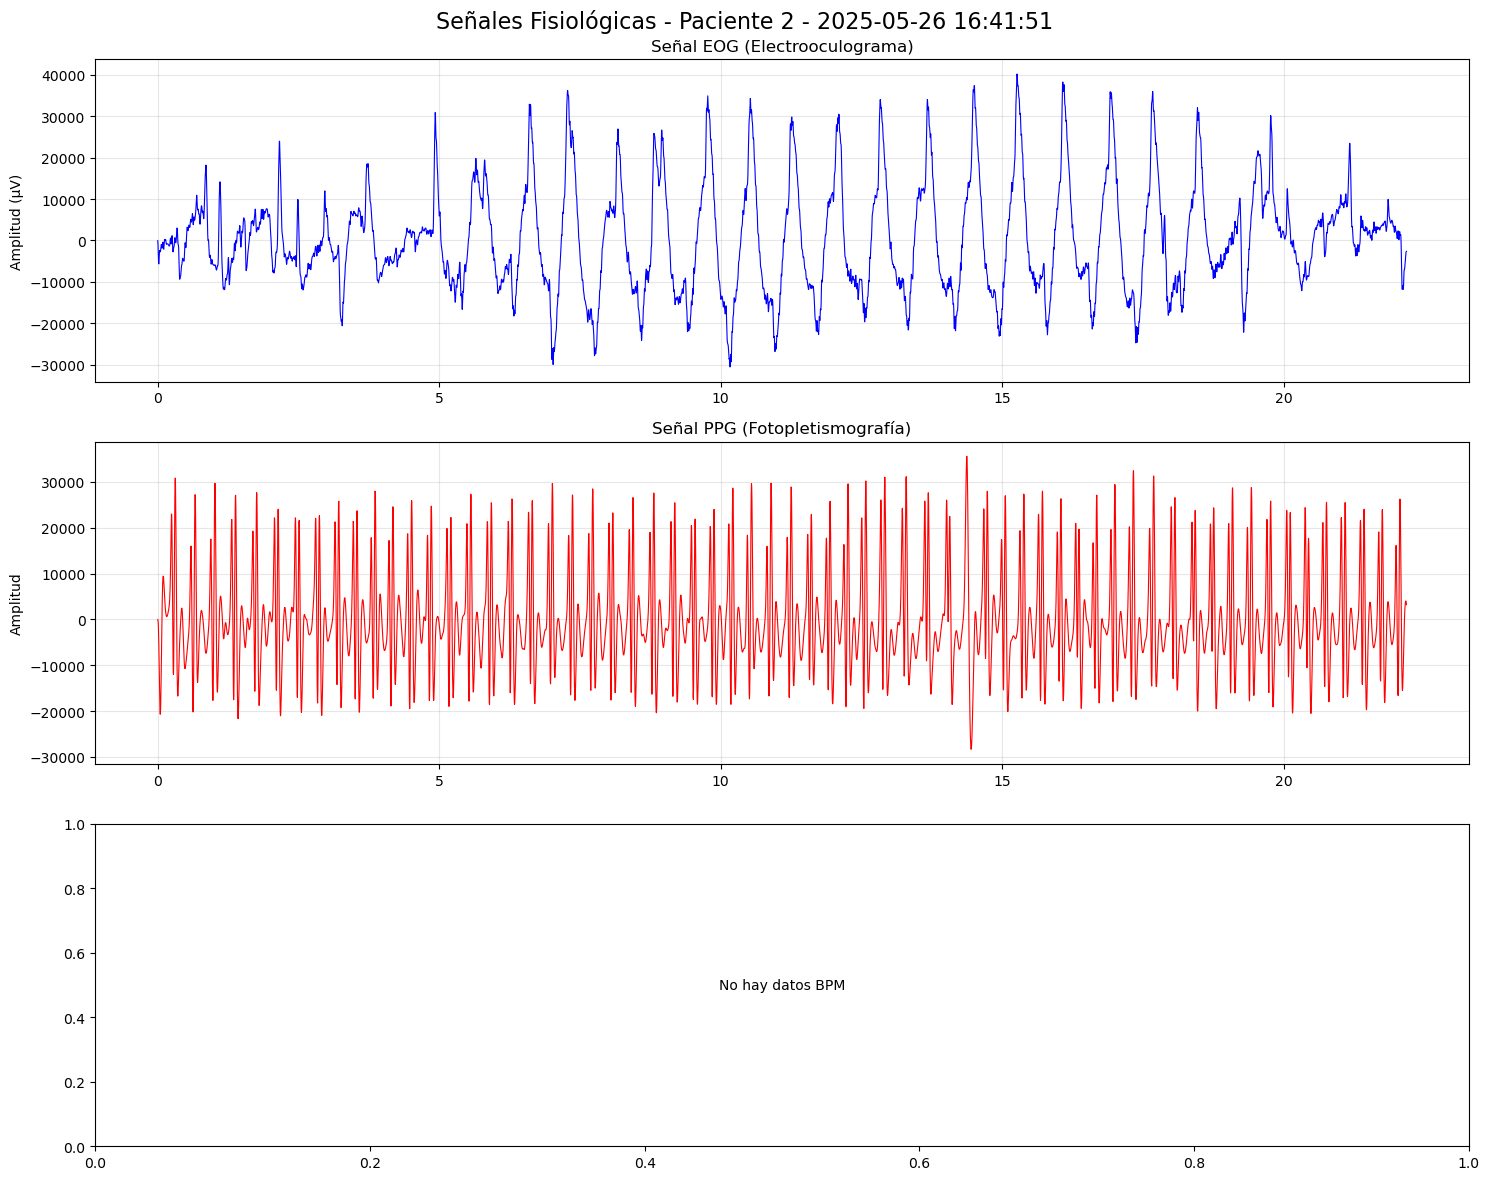

In [47]:
analyzer.plot_session_signals(1)

In [13]:
from src.database.database_manager import DatabaseManager

In [51]:
sessions = DatabaseManager.get_sessions_for_patient(2)

In [53]:
sessions

[{'id': 2,
  'fecha': '2025-05-26 16:41:51',
  'notas': 'Sesión actualizada el 2025-05-26 16:43:23. Datos almacenados: 5545 muestras.'}]

In [54]:
sessions_b = DatabaseManager.get_session(2, include_data=True)

In [56]:
sessions_b["fecha"]

'2025-05-26 16:41:51'

In [57]:
sessions_b.keys()

dict_keys(['id', 'id_paciente', 'fecha', 'datos_eog', 'datos_ppg', 'notas'])